In [12]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [13]:
! pip install xlrd

In [14]:
print(numpy.__version__,"\n")
print(matplotlib.__version__,"\n")
print(pd.__version__,"\n")
print(tensorflow.__version__,"\n")
print(keras.__version__,"\n")
print(sklearn.__version__,"\n")

1.16.2 

3.0.3 

0.24.2 

1.13.1 

2.2.4 

0.20.3 



In [15]:
#產生(X,Y)資料的副程式，Y是尖峰負載
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,1])
    return numpy.array(dataX), numpy.array(dataY)


In [16]:
#從excel載入資料
df = pd.read_excel("MW.xlsx")

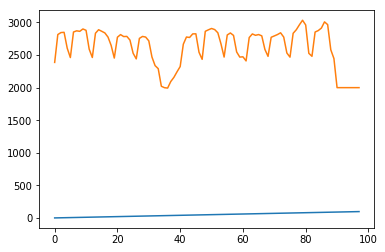

In [17]:
plt.plot(df)
plt.show()

In [18]:
df = df.values
df = df.astype('float32')

In [19]:
print(df)

[[1.0000e+00 2.3872e+03]
 [2.0000e+00 2.8148e+03]
 [3.0000e+00 2.8452e+03]
 [4.0000e+00 2.8490e+03]
 [5.0000e+00 2.6054e+03]
 [6.0000e+00 2.4618e+03]
 [7.0000e+00 2.8537e+03]
 [8.0000e+00 2.8719e+03]
 [9.0000e+00 2.8641e+03]
 [1.0000e+01 2.9006e+03]
 [1.1000e+01 2.8798e+03]
 [1.2000e+01 2.5905e+03]
 [1.3000e+01 2.4629e+03]
 [1.4000e+01 2.8348e+03]
 [1.5000e+01 2.8887e+03]
 [1.6000e+01 2.8649e+03]
 [1.7000e+01 2.8395e+03]
 [1.8000e+01 2.7756e+03]
 [1.9000e+01 2.6477e+03]
 [2.0000e+01 2.4539e+03]
 [2.1000e+01 2.7739e+03]
 [2.2000e+01 2.8140e+03]
 [2.3000e+01 2.7838e+03]
 [2.4000e+01 2.7863e+03]
 [2.5000e+01 2.7296e+03]
 [2.6000e+01 2.5282e+03]
 [2.7000e+01 2.4414e+03]
 [2.8000e+01 2.7557e+03]
 [2.9000e+01 2.7858e+03]
 [3.0000e+01 2.7760e+03]
 [3.1000e+01 2.7181e+03]
 [3.2000e+01 2.4709e+03]
 [3.3000e+01 2.3382e+03]
 [3.4000e+01 2.2915e+03]
 [3.5000e+01 2.0214e+03]
 [3.6000e+01 1.9992e+03]
 [3.7000e+01 1.9936e+03]
 [3.8000e+01 2.0938e+03]
 [3.9000e+01 2.1581e+03]
 [4.0000e+01 2.2436e+03]


In [28]:
#分為訓練資料跟預測資料
train, test = df[0:90,:], df[90:99,:]
print(train,"\n\n", test)

[[1.0000e+00 2.3872e+03]
 [2.0000e+00 2.8148e+03]
 [3.0000e+00 2.8452e+03]
 [4.0000e+00 2.8490e+03]
 [5.0000e+00 2.6054e+03]
 [6.0000e+00 2.4618e+03]
 [7.0000e+00 2.8537e+03]
 [8.0000e+00 2.8719e+03]
 [9.0000e+00 2.8641e+03]
 [1.0000e+01 2.9006e+03]
 [1.1000e+01 2.8798e+03]
 [1.2000e+01 2.5905e+03]
 [1.3000e+01 2.4629e+03]
 [1.4000e+01 2.8348e+03]
 [1.5000e+01 2.8887e+03]
 [1.6000e+01 2.8649e+03]
 [1.7000e+01 2.8395e+03]
 [1.8000e+01 2.7756e+03]
 [1.9000e+01 2.6477e+03]
 [2.0000e+01 2.4539e+03]
 [2.1000e+01 2.7739e+03]
 [2.2000e+01 2.8140e+03]
 [2.3000e+01 2.7838e+03]
 [2.4000e+01 2.7863e+03]
 [2.5000e+01 2.7296e+03]
 [2.6000e+01 2.5282e+03]
 [2.7000e+01 2.4414e+03]
 [2.8000e+01 2.7557e+03]
 [2.9000e+01 2.7858e+03]
 [3.0000e+01 2.7760e+03]
 [3.1000e+01 2.7181e+03]
 [3.2000e+01 2.4709e+03]
 [3.3000e+01 2.3382e+03]
 [3.4000e+01 2.2915e+03]
 [3.5000e+01 2.0214e+03]
 [3.6000e+01 1.9992e+03]
 [3.7000e+01 1.9936e+03]
 [3.8000e+01 2.0938e+03]
 [3.9000e+01 2.1581e+03]
 [4.0000e+01 2.2436e+03]


In [29]:
#產生X,Y資料
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX,"\n", trainY,"\n", testX,"\n", testY)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [21.]
 [22.]
 [23.]
 [24.]
 [25.]
 [26.]
 [27.]
 [28.]
 [29.]
 [30.]
 [31.]
 [32.]
 [33.]
 [34.]
 [35.]
 [36.]
 [37.]
 [38.]
 [39.]
 [40.]
 [41.]
 [42.]
 [43.]
 [44.]
 [45.]
 [46.]
 [47.]
 [48.]
 [49.]
 [50.]
 [51.]
 [52.]
 [53.]
 [54.]
 [55.]
 [56.]
 [57.]
 [58.]
 [59.]
 [60.]
 [61.]
 [62.]
 [63.]
 [64.]
 [65.]
 [66.]
 [67.]
 [68.]
 [69.]
 [70.]
 [71.]
 [72.]
 [73.]
 [74.]
 [75.]
 [76.]
 [77.]
 [78.]
 [79.]
 [80.]
 [81.]
 [82.]
 [83.]
 [84.]
 [85.]
 [86.]
 [87.]
 [88.]] 
 [2814.8 2845.2 2849.  2605.4 2461.8 2853.7 2871.9 2864.1 2900.6 2879.8
 2590.5 2462.9 2834.8 2888.7 2864.9 2839.5 2775.6 2647.7 2453.9 2773.9
 2814.  2783.8 2786.3 2729.6 2528.2 2441.4 2755.7 2785.8 2776.  2718.1
 2470.9 2338.2 2291.5 2021.4 1999.2 1993.6 2093.8 2158.1 2243.6 2323.6
 2666.7 2776.8 2769.9 2825.  2826.2 2543.2 2434.3 2864.5 2887.6 2907.8
 2891.2 2842.  2672.3 2469

In [30]:
#因為LSTM要讀的檔案格式必須為[samples, time steps, feature],所以要將x資料reshape
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
print(trainX,"\n\n",testX)

[[[ 1.]]

 [[ 2.]]

 [[ 3.]]

 [[ 4.]]

 [[ 5.]]

 [[ 6.]]

 [[ 7.]]

 [[ 8.]]

 [[ 9.]]

 [[10.]]

 [[11.]]

 [[12.]]

 [[13.]]

 [[14.]]

 [[15.]]

 [[16.]]

 [[17.]]

 [[18.]]

 [[19.]]

 [[20.]]

 [[21.]]

 [[22.]]

 [[23.]]

 [[24.]]

 [[25.]]

 [[26.]]

 [[27.]]

 [[28.]]

 [[29.]]

 [[30.]]

 [[31.]]

 [[32.]]

 [[33.]]

 [[34.]]

 [[35.]]

 [[36.]]

 [[37.]]

 [[38.]]

 [[39.]]

 [[40.]]

 [[41.]]

 [[42.]]

 [[43.]]

 [[44.]]

 [[45.]]

 [[46.]]

 [[47.]]

 [[48.]]

 [[49.]]

 [[50.]]

 [[51.]]

 [[52.]]

 [[53.]]

 [[54.]]

 [[55.]]

 [[56.]]

 [[57.]]

 [[58.]]

 [[59.]]

 [[60.]]

 [[61.]]

 [[62.]]

 [[63.]]

 [[64.]]

 [[65.]]

 [[66.]]

 [[67.]]

 [[68.]]

 [[69.]]

 [[70.]]

 [[71.]]

 [[72.]]

 [[73.]]

 [[74.]]

 [[75.]]

 [[76.]]

 [[77.]]

 [[78.]]

 [[79.]]

 [[80.]]

 [[81.]]

 [[82.]]

 [[83.]]

 [[84.]]

 [[85.]]

 [[86.]]

 [[87.]]

 [[88.]]] 

 [[[91.]]

 [[92.]]

 [[93.]]

 [[94.]]

 [[95.]]

 [[96.]]]


In [32]:
#建立及訓練LSTM模型
look_back = 1
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 7236225.6733
Epoch 2/100
 - 0s - loss: 7235027.5909
Epoch 3/100
 - 0s - loss: 7233834.1023
Epoch 4/100
 - 0s - loss: 7232641.5483
Epoch 5/100
 - 0s - loss: 7231447.0341
Epoch 6/100
 - 0s - loss: 7230251.8239
Epoch 7/100
 - 0s - loss: 7229054.2614
Epoch 8/100
 - 0s - loss: 7227847.9545
Epoch 9/100
 - 0s - loss: 7226627.4574
Epoch 10/100
 - 0s - loss: 7225374.0369
Epoch 11/100
 - 0s - loss: 7222326.9773
Epoch 12/100
 - 0s - loss: 7218864.7358
Epoch 13/100
 - 0s - loss: 7216841.5795
Epoch 14/100
 - 0s - loss: 7214979.7642
Epoch 15/100
 - 0s - loss: 7213200.3807
Epoch 16/100
 - 0s - loss: 7211472.8438
Epoch 17/100
 - 0s - loss: 7209778.1591
Epoch 18/100
 - 0s - loss: 7208107.6477
Epoch 19/100
 - 0s - loss: 7206456.7102
Epoch 20/100
 - 0s - loss: 7204818.5710
Epoch 21/100
 - 0s - loss: 7203195.3210
Epoch 22/100
 - 0s - loss: 7201581.7301
Epoch 23/100
 - 0s - loss: 7199976.1591
Epoch 24/100
 - 0s - loss: 7198379.2812
Epoch 25/100
 - 0s - loss: 7196785.6761
Epoch 26/

In [33]:
#預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [34]:
#計算最終結果
a = [92, 93, 94, 95, 96, 97, 98]
result=[(a[0]*testPredict[5]), (a[1]*testPredict[5]), (a[2]*testPredict[5]), (a[3]*testPredict[5]), (a[4]*testPredict[5]), (a[5]*testPredict[5]), (a[6]*testPredict[5]), ]
print(result)

[array([3284.312], dtype=float32), array([3320.011], dtype=float32), array([3355.71], dtype=float32), array([3391.4092], dtype=float32), array([3427.1082], dtype=float32), array([3462.8071], dtype=float32), array([3498.5063], dtype=float32)]


In [35]:
date = [1080402, 1080403, 1080404, 1080405, 1080406, 1080407, 1080408, ]

In [39]:
#將結果輸出成csv檔
date = pd.Series(date)
result = pd.Series(result)
d = {'date':date, 'MW':result}
submission = pd.DataFrame(data=d)
print(submission)

      date           MW
0  1080402   [3284.312]
1  1080403   [3320.011]
2  1080404    [3355.71]
3  1080405  [3391.4092]
4  1080406  [3427.1082]
5  1080407  [3462.8071]
6  1080408  [3498.5063]


In [40]:
submission.to_csv("submission", sep='\t', encoding='utf-8')